In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from sklearn import svm #SVM software

In [2]:
datafile = 'data/ex6data1.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
#NOT inserting a column of 1's in case SVM software does it for me automatically...
#X =     np.insert(X    ,0,1,axis=1)

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

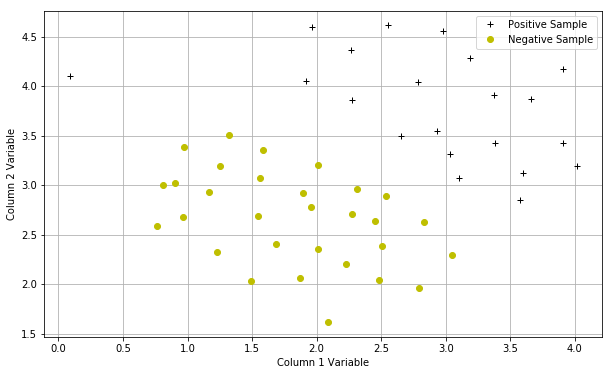

In [3]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData()

In [4]:
#Function to draw the SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            p=np.array([xvals[i],yvals[j]])
            #print(p.shape)           
            zvals[i][j] = float(my_svm.predict(p.reshape(1,2)))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

In [5]:
#linear_svm = svm.SVC(C=1, kernel='linear')
#X1 = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
#y1 = np.array([1, 1, 2, 2])
#print(X1.shape, y1.shape)
#linear_svm.fit(X, y)
#print(linear_svm.predict([[-0.8, -1]]))

In [6]:
z=y.reshape(1,-1).flatten()
u = np.array([1, 1, 2, 2])
X.shape, z.shape,u.shape

((51, 2), (51,), (4,))

In [7]:
# Run the SVM training (with C = 1) using SVM software. 
# When C = 1, you should find that the SVM puts the decision boundary 
# in the gap between the two datasets and misclassifies the data point on the far left

#First we make an instance of an SVM with C=1 and 'linear' kernel
linear_svm = svm.SVC(C=1, kernel='linear')
#Now we fit the SVM to our X matrix (no bias unit)
linear_svm.fit( X, z)
#Now we plot the decision boundary
#plotData()
#plotBoundary(linear_svm,0,4.5,1.5,5)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

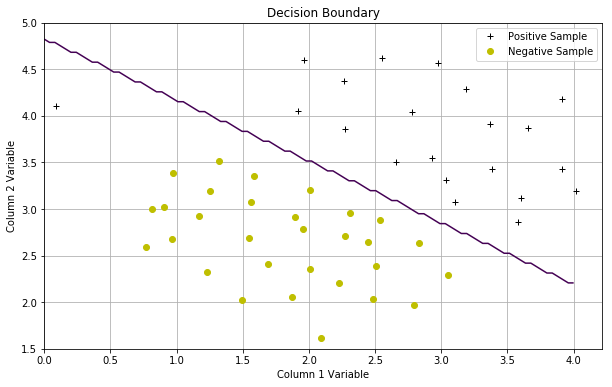

In [8]:
plotData()
plotBoundary(linear_svm,0,4,1.5,5)

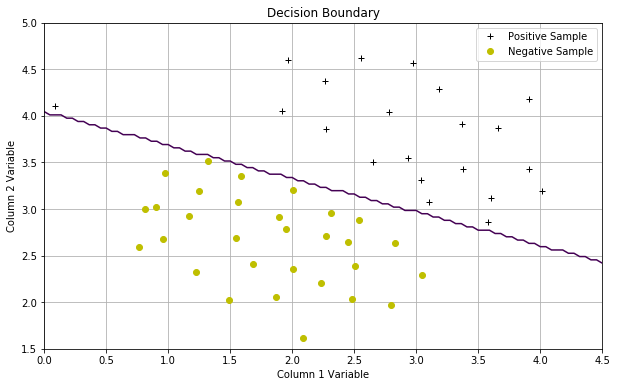

In [9]:
# When C = 100, you should find that the SVM now classifies every 
# single example correctly, but has a decision boundary that does 
# not appear to be a natural fit for the data.
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit( X, y.flatten() )
plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)

In [10]:
# Here's how to use this SVM software with a custom kernel:
# http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
def gaussKernel(x1, x2, sigma):
    sigmasquared = np.power(sigma,2)
    return np.exp(-(x1-x2).T.dot(x1-x2)/(2*sigmasquared))

# x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
# sim = gaussianKernel(x1, x2, sigma);
# this value should be about 0.324652
print (gaussKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.))

0.324652467358


In [11]:
# Now that I've shown I can implement a gaussian Kernel,
# I will use the of-course built-in gaussian kernel in my SVM software
# because it's certainly more optimized than mine.
# It is called 'rbf' and instead of dividing by sigmasquared,
# it multiplies by 'gamma'. As long as I set gamma = sigma^(-2),
# it will work just the same.

In [13]:
datafile = 'data/ex6data2.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

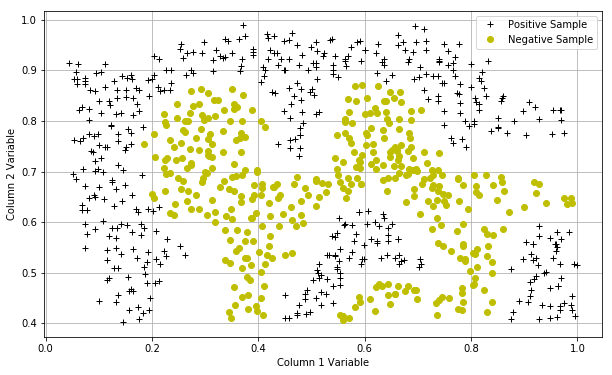

In [14]:
plotData()

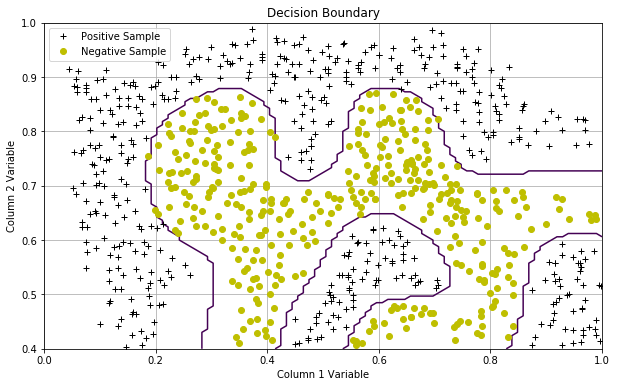

In [15]:
# Train the SVM with the Gaussian kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit( X, y.flatten() )
plotData()
plotBoundary(gaus_svm,0,1,.4,1.0)

In [18]:
datafile = 'data/ex6data3.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

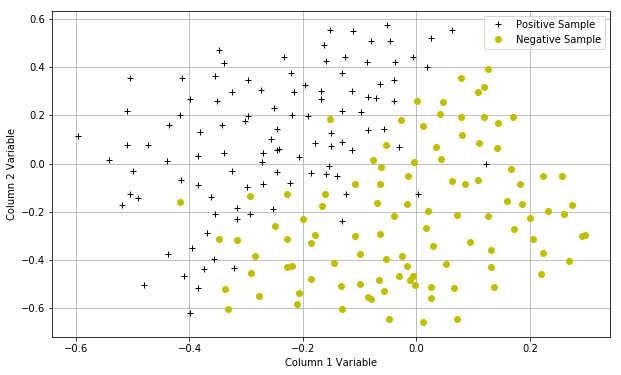

In [19]:
plotData()

In [20]:
# Your task is to use the cross validation set Xval, yval to 
# determine the best C and σ parameter to use.

# The score() function for a trained SVM takes in
# X and y to test the score on, and the (float)
# value returned is "Mean accuracy of self.predict(X) wrt. y"

Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue,-2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf', gamma=gamma)
        gaus_svm.fit( X, y.flatten() )
        this_score = gaus_svm.score(Xval,yval)
        #print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
            
print ("Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0],best_pair[1],best_score))

Best C, sigma pair is (0.300000, 0.100000) with a score of 0.965000.
